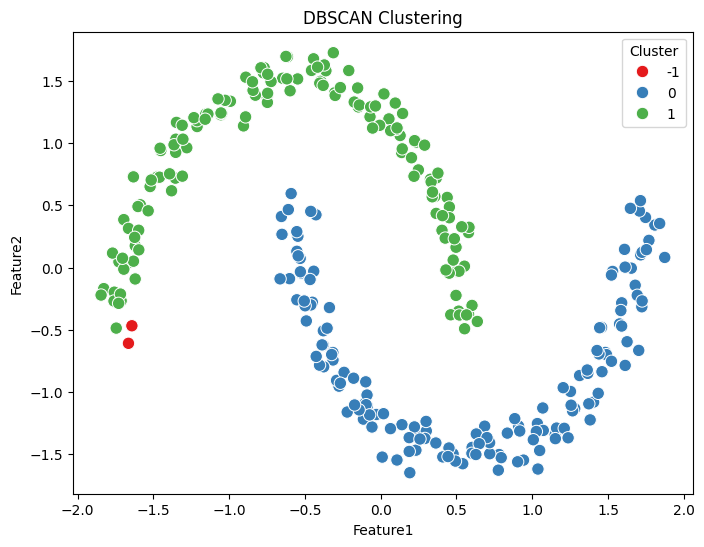

Number of clusters found: 2
Number of noise points: 2


In [1]:
# 1️⃣ Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Generate Dataset (non-linear shape)
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

# 3️⃣ Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4️⃣ Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# 5️⃣ Visualize Clusters
dbscan_df = pd.DataFrame(X_scaled, columns=['Feature1', 'Feature2'])
dbscan_df['Cluster'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Cluster', palette='Set1', data=dbscan_df, s=80)
plt.title("DBSCAN Clustering")
plt.show()

# 6️⃣ Count of clusters (excluding noise)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print("Number of clusters found:", n_clusters)
print("Number of noise points:", list(clusters).count(-1))
